# Data Deletion Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import IndependentCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_logistic_regression

X, y = load_dataset('phoneme')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
staying_probabilities = {i:(1 - 0.05 * i) for i in range(NUM_OF_DATA_SOURCES)}
coalition_probability = IndependentCoalitionProbability(staying_probabilities)
model = model_logistic_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

N = 100
data_source_values = {}
for i in data_sources:
    data_source_values[i] = []
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

for n_iter in range(N):
    print(f"Iteration #{n_iter}")
    
    grand_coalition = coalition_probability.simulate()
    values = valuable_model.valuate(data_valuation_function="partial shapley", partial_support=grand_coalition)
    for i in values:
        data_source_values[i].append(values[i])
        
X = np.arange(NUM_OF_DATA_SOURCES)
means = []
stdevs = []
for i in data_source_values:
    means.append(mean(data_source_values[i]))
    stdevs.append(stdev(data_source_values[i]))
    
means = np.array(means)
stdevs = np.array(stdevs)

Iteration #0
Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64
Iteration #65
Iteration #66
Iteration #67
Iteration #68
Iteration #69
Iteration #70
Iteration #71
It

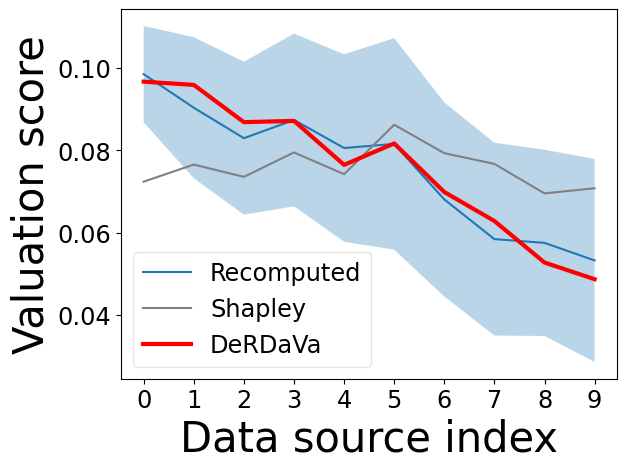

In [8]:
import os

fig, ax = plt.subplots()

average_line, = ax.plot(support_set, means, color="C0")
average_line.set_label("Recomputed")
ax.fill_between(X, means-1/2 * stdevs, means+1/2 * stdevs, facecolor="C0", alpha=0.3)

shapley_values = valuable_model.valuate(data_valuation_function="shapley")
shapley_line, = ax.plot(support_set, shapley_values.values(), color="gray")
shapley_line.set_label(r"Shapley")

urdv_values = valuable_model.valuate(data_valuation_function="robust shapley", coalition_probability=coalition_probability)
urdv_line, = ax.plot(support_set, urdv_values.values(), color="red", linewidth=3)
urdv_line.set_label(r"DeRDaVa")

# ax.set_title(r"Graph of Various Valuation Scores against Data Sources")
ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize=30)
ax.set_xlabel("Data source index", fontsize=30)
ax.legend(fontsize="xx-large", facecolor='white', framealpha=0.5, loc='lower left')
ax.tick_params(axis='both', labelsize='xx-large')


plt.show()

PATH_TO_IMAGES = "./images/data_deletion_simulation/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "dd_10_phoneme_logistic_shapley.png"), dpi=300, bbox_inches='tight')

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from urdava.coalition_probability import RandomCoalitionProbability
from urdava.data_source import generate_random_data_sources, add_classification_noise
from urdava.data_valuation import ValuableModel
from urdava.dataset import load_dataset
from urdava.model_utility import IClassificationModel, model_gaussian_nb

X, y = load_dataset('wind')

NUM_OF_DATA_SOURCES = 10
support_set = tuple(range(NUM_OF_DATA_SOURCES))
coalition_probability = RandomCoalitionProbability(support_set)
model = model_gaussian_nb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
data_sources = generate_random_data_sources(X_train, y_train, 
                                                num_of_data_sources=NUM_OF_DATA_SOURCES)

N = 100
data_source_values = {}
for i in data_sources:
    data_source_values[i] = []
    
model_utility_function = IClassificationModel(model, data_sources, X_test, y_test)
valuable_model = ValuableModel(support_set, model_utility_function)

for n_iter in range(N):
    print(f"Iteration #{n_iter}")
    
    grand_coalition = coalition_probability.simulate()
    values = valuable_model.valuate(data_valuation_function="partial beta", partial_support=grand_coalition, alpha=16, beta=1)
    for i in values:
        data_source_values[i].append(values[i])
        
X = np.arange(NUM_OF_DATA_SOURCES)
means = []
stdevs = []
for i in data_source_values:
    means.append(mean(data_source_values[i]))
    stdevs.append(stdev(data_source_values[i]))
    
means = np.array(means)
stdevs = np.array(stdevs)

Iteration #0
Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64
Iteration #65
Iteration #66
Iteration #67
Iteration #68
Iteration #69
Iteration #70
Iteration #71
It

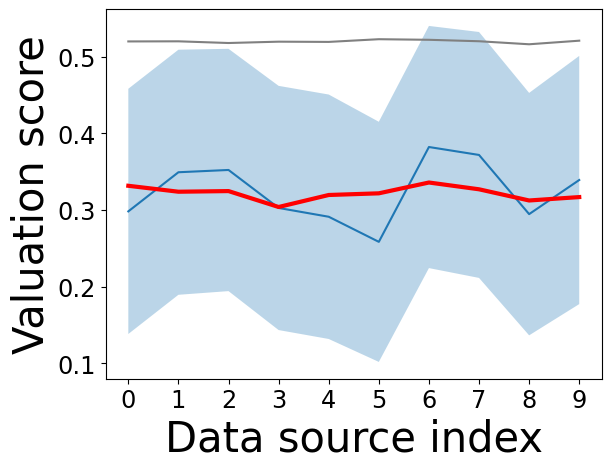

In [14]:
import os

fig, ax = plt.subplots()

average_line, = ax.plot(support_set, means, color="C0")
average_line.set_label("Recomputed")
ax.fill_between(X, means-1/2 * stdevs, means+1/2 * stdevs, facecolor="C0", alpha=0.3)

shapley_values = valuable_model.valuate(data_valuation_function="beta", alpha=16, beta=1)
shapley_line, = ax.plot(support_set, shapley_values.values(), color="grey")
shapley_line.set_label(r"$\mathtt{Beta(16, 1)}$")

urdv_values = valuable_model.valuate(data_valuation_function="robust beta", coalition_probability=coalition_probability, alpha=16, beta=1)
urdv_line, = ax.plot(support_set, urdv_values.values(), color="red", linewidth=3)
urdv_line.set_label(r"DeRDaVa")

# ax.set_title(r"Graph of Various Valuation Scores against Data Sources")
ax.set_xticks(ticks=list(range(NUM_OF_DATA_SOURCES)))
ax.set_ylabel("Valuation score", fontsize=30)
ax.set_xlabel("Data source index", fontsize=30)
# ax.legend(fontsize="large", facecolor='white', framealpha=0.5, loc='lower right')
ax.tick_params(axis='both', labelsize='xx-large')


plt.show()

PATH_TO_IMAGES = "./images/data_deletion_simulation/"
if not os.path.isdir(PATH_TO_IMAGES):
    os.makedirs(PATH_TO_IMAGES)
fig.savefig(os.path.join(PATH_TO_IMAGES, "dd_10_wind_nb_beta_16_1.png"), dpi=300, bbox_inches='tight')